1. with distribution of I at x=L for different time

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
L = 20
a = 0.5
wavelength = 0.5
k = 2 * np.pi / wavelength  # Wave number

# Create the grid of coordinates
x = np.linspace(0, L, 1000)
y = np.linspace(0, L, 1000)
X, Y = np.meshgrid(x, y)

# Positions of the sources
source1 = (0, a + L / 2)
source2 = (0, -a + L / 2)

# Initialize the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [2, 1]})

# Initial empty image
im = ax1.imshow(np.zeros((1000, 1000)), extent=[0, L, 0, L], origin='lower', cmap='magma', vmax=4)
ax1.set_title('Intensity - Superposition of Two Plane Waves')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
fig.colorbar(im, ax=ax1, label='Intensity')

# Determine a fixed value of x
x_fixed = L  # For example, x_fixed is set to L
index_x_fixed = np.argmin(np.abs(x - x_fixed))

# Prepare the intensity plot for the fixed x
ax2.set_xlim(0, L)
ax2.set_ylim(0, 4)  # Adjust based on expected intensity values
ax2.set_title(f'Intensity of the Wave for x = {x_fixed:.2f}')
ax2.set_xlabel('y')
ax2.set_ylabel('Intensity')

# Function to update the plot
def update(frame):
    # Calculate distances from the grid points to the sources
    R1 = np.sqrt((X - source1[0]) ** 2 + (Y - source1[1]) ** 2)
    R2 = np.sqrt((X - source2[0]) ** 2 + (Y - source2[1]) ** 2)

    # Calculate waves with time dependence
    t = frame * 0.1  # Time step for the animation
    onde1 = np.sin(k * R1 - 2 * np.pi * t)  # Monochromatic sinusoidal wave
    onde2 = np.sin(k * R2 - 2 * np.pi * t)

    # Superposition of waves
    wave_superposition = onde1 + onde2
    intensite = np.abs(wave_superposition) ** 2

    # Update the intensity image
    im.set_array(intensite)  # Update the image data
    ax1.set_title(f'Intensity - Superposition of Two Plane Waves at t={t:.2f}s')

    # Calculate and update intensity for the fixed x
    intensity_fixed_x = intensite[:, index_x_fixed]
    ax2.clear()  # Clear the previous line plot
    ax2.plot(y, intensity_fixed_x, color='blue')  # Update line plot for intensity
    ax2.set_xlim(0, L)
    ax2.set_ylim(0, np.max(intensity_fixed_x) * 1.1)  # Update y-limit based on new intensity
    ax2.set_title(f'Intensity of the Wave for x = {x_fixed:.2f}')
    ax2.set_xlabel('y')
    ax2.set_ylabel('Intensity')

    return im, 

# Create the animation
anim = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=100)

# Save the animation
anim.save('wave_superposition_animation_a=0_5.gif', writer='ffmpeg', fps=10)  # Save as MP4 or gif

plt.close(fig)  # Close the figure to prevent displaying it


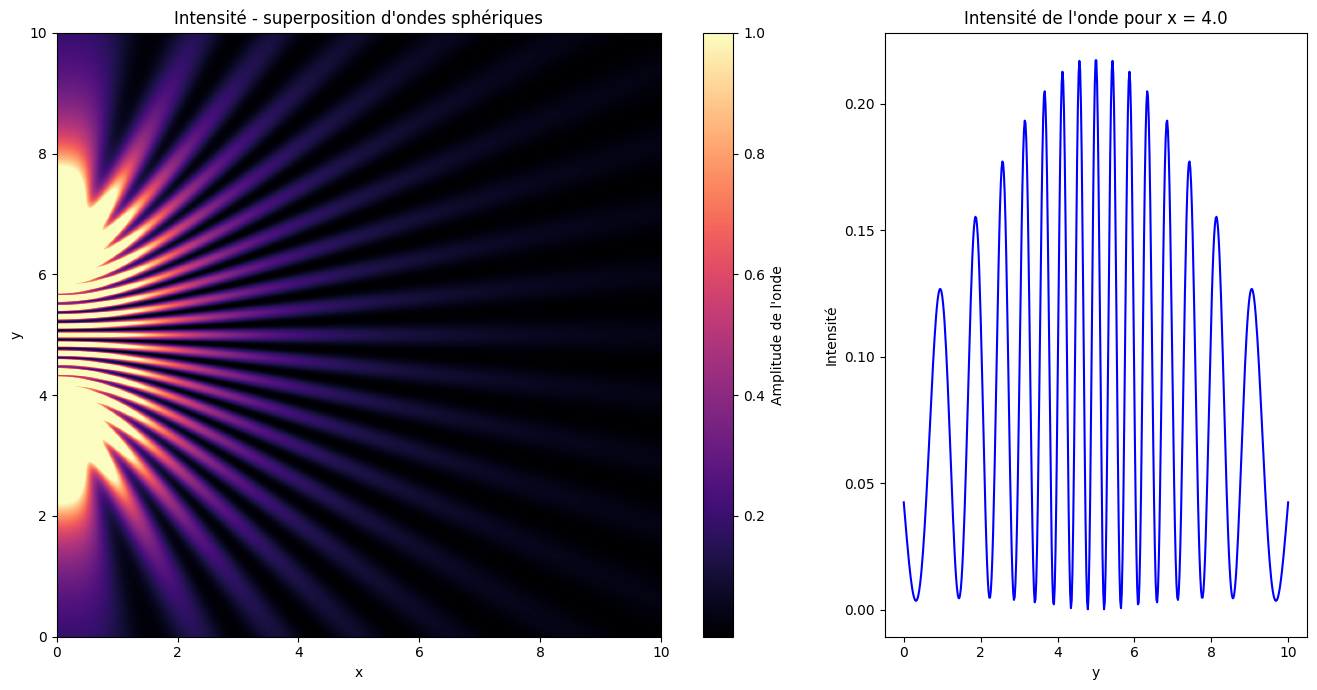

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

j = cmath.sqrt(-1)

# Paramètres
L = 10  # Taille du carré
a = 1.5  # Position des sources d'ondes
wavelength = 0.3  # Longueur d'onde
k = 2 * np.pi / wavelength  # Nombre d'onde

# Création de la grille de coordonnées
x = np.linspace(0, L, 500)
y = np.linspace(0, L, 500)
X, Y = np.meshgrid(x, y)

# Positions des sources
source1 = (0, a + L / 2)
source2 = (0, -a + L / 2)

# Calcul des distances des points de la grille aux sources
R1 = np.sqrt((X - source1[0]) ** 2 + (Y - source1[1]) ** 2)
R2 = np.sqrt((X - source2[0]) ** 2 + (Y - source2[1]) ** 2)

# Calcul des ondes
wave1 = np.exp(j * (k * R1)) / R1  # sin(kr)
wave2 = np.exp(j * (k * R2)) / R2

# Superposition des ondes
wave_superposition = wave1 + wave2

# Déterminer une valeur de x fixe
x_fixed = L / 2.5
index_x_fixed = np.argmin(np.abs(x - x_fixed))

# Calculer l'intensité des ondes superposées pour x fixe
intensity_fixed_x = np.abs(wave_superposition[:, index_x_fixed]) ** 2

# Création de la figure avec deux sous-figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [2, 1]})

# Visualisation de la superposition des ondes
im = ax1.imshow(np.abs(wave_superposition) ** 2, extent=[0, L, 0, L], origin='lower', cmap='magma', vmax=1)
ax1.set_title("Intensité - superposition d'ondes sphériques")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
fig.colorbar(im, ax=ax1, label="Amplitude de l'onde")

# Visualisation de l'intensité pour x fixé
ax2.plot(y, intensity_fixed_x, color='blue')
ax2.set_title(f'Intensité de l\'onde pour x = {x_fixed}')
ax2.set_xlabel('y')
ax2.set_ylabel('Intensité')

plt.tight_layout()
plt.show()

[[ 0.00605036  0.00604776  0.0060399  ...  0.00405242  0.03923554
   0.06658848]
 [ 0.00567507  0.00567599  0.00567867 ... -0.01350751  0.02314671
   0.05516776]
 [ 0.00388859  0.00389285  0.00390558 ... -0.03050109  0.00590323
   0.04110431]
 ...
 [ 0.00388859  0.00389285  0.00390558 ... -0.03050109  0.00590323
   0.04110431]
 [ 0.00567507  0.00567599  0.00567867 ... -0.01350751  0.02314671
   0.05516776]
 [ 0.00605036  0.00604776  0.0060399  ...  0.00405242  0.03923554
   0.06658848]]


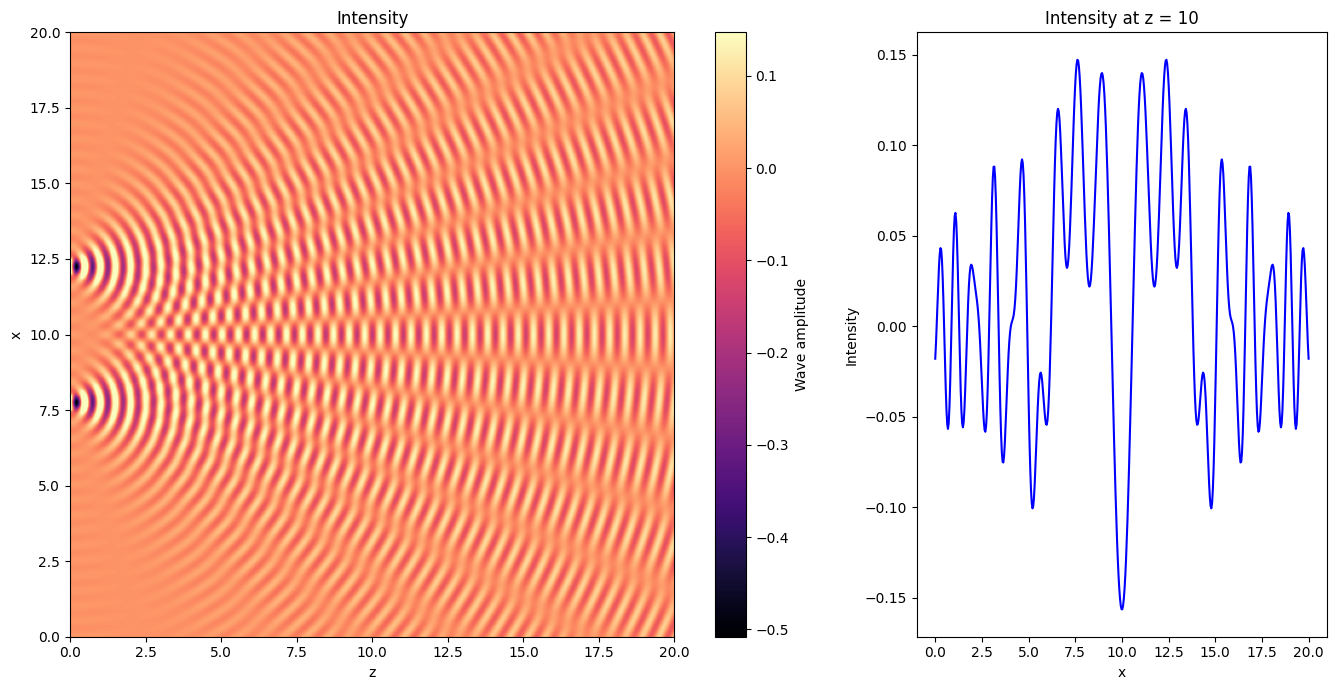

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Function to calculate and display wave intensity
# def plot_wave_superposition(L=10, a=1.5, D=1, wavelength=0.5):

j = 1j
# Parameters
L = 10  # Size of the Square
a = 0.5  # Position of the Wave Sources
D = 4
wavelength = 0.5
#wavelength = 0.3  # Wavelength
k = 2 * np.pi / wavelength  # Wave Number
Lx = 20
Lz = 20

# Creation of the Coordinate Grid
x = np.linspace(0, Lx, 500)
z = np.linspace(0, Lz, 500)
X, Z = np.meshgrid(x, z, indexing="ij")

# Positions of the Sources
slits_x = np.hstack((Lx/2 + D/2 + np.linspace(0, a, 30),
                     Lx/2 - D/2 - np.linspace(0, a, 30)))

# Initialize the superposition
wave_superposition = 0

for slit_x in slits_x:
    # Calculation of the Distances from the Grid Points to the Sources
    R = np.sqrt((X - slit_x) ** 2 + (Z - 0) ** 2)

    # Avoid division by zero by adding a small value to R
    wave = np.exp(1j * (k * R)) / (np.sqrt(R) + 1e-10)

    # Superposition of sinusoidal monochromatic waves
    wave_superposition += wave

# Determine a fixed value of x to find the intensity distribution at thit position
z_screen = L 
index_z_screen = np.argmin(np.abs(z - z_screen))


# Calculate intensity
intensity = np.real(wave_superposition)
intensity = intensity / np.abs(intensity).max()
# Normalize intensity for better visualization

print(intensity)

# Calculer l'intensité des ondes superposées pour x fixe
intensity_z_screen = intensity[:, index_z_screen]

# Création de la figure avec deux sous-figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [2, 1]})

# Visualisation de la superposition des ondes
im = ax1.imshow(intensity, extent=[0, Lx, 0, Lz], origin='lower', cmap='magma', vmax=intensity_z_screen.max()
)
ax1.set_title("Intensity")
ax1.set_xlabel('z')
ax1.set_ylabel('x')
fig.colorbar(im, ax=ax1, label="Wave amplitude")

# Visualisation de l'intensité pour x fixé
ax2.plot(x, intensity_z_screen, color='blue')
ax2.set_title(f'Intensity at z = {z_screen}')
ax2.set_xlabel('x')
ax2.set_ylabel('Intensity')

plt.tight_layout()
plt.show()

# Utilisation de interact pour créer les widgets de contrôle
# interact(plot_wave_superposition,
#             L=widgets.FloatSlider(min=5, max=20, step=1, value=10, description='L'),
#             a=widgets.FloatSlider(min=0, max=4, step=0.1, value=1, description='a'),
#             D=widgets.FloatSlider(min=0, max=4, step=0.1, value=1, description='D'),
#             wavelength=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=0.5, description='Wavelength, mkm'),
#         )
